**Step1 :IMPORT LIBRARY**
---
---


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

**Step 2 READ DATA**
---
---

In [8]:
#Proceed to read csv data using pandas library with the command pd.read_csv
df = pd.read_csv('/content/drive/MyDrive/Team5-PAPERREPORT/Data/DATA(2002-2022).csv')
df

,Date,Prices
0,2002-01-01,4170449.50
1,2002-01-02,4198629.19
2,2002-01-03,4206113.25
3,2002-01-04,4190692.00
4,2002-01-07,4203514.59
...,...,...
5284,2022-04-04,44102530.37
5285,2022-04-05,44470144.87
5286,2022-04-06,44137702.89
5287,2022-04-07,44176594.17


In [9]:
#create a new column name 'Time'
df['Time'] = np.arange(len(df.index))
df

,Date,Prices,Time
0,2002-01-01,4170449.50,0
1,2002-01-02,4198629.19,1
2,2002-01-03,4206113.25,2
3,2002-01-04,4190692.00,3
4,2002-01-07,4203514.59,4
...,...,...,...
5284,2022-04-04,44102530.37,5284
5285,2022-04-05,44470144.87,5285
5286,2022-04-06,44137702.89,5286
5287,2022-04-07,44176594.17,5287


In [20]:
# change the datatype of Date column from object to datatime
df['Date'] = pd.to_datetime(df['Date'])
df.info() #check the structure of data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5289 entries, 2002-01-01 to 2022-04-08
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     5289 non-null   datetime64[ns]
 1   Prices   5289 non-null   float64       
 2   Time     5289 non-null   int64         
 3   Datenew  5289 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 206.6 KB


**Step 3 DATA VISUALISATION**
---
---

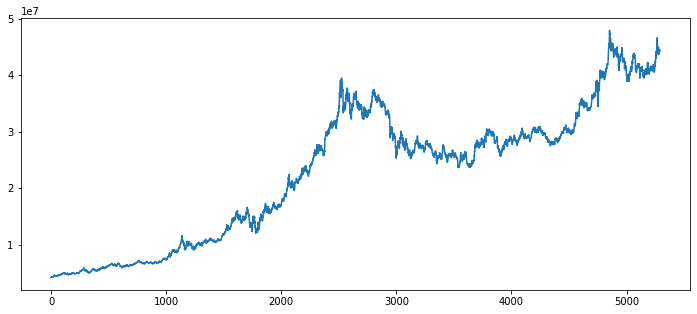

In [11]:
df['Prices'].plot(figsize = (12,5))

**Step 4: Prediction for the future next 30days**
---
---

In [12]:
# Create an index column from data of Date column
df['Datenew'] = pd.to_datetime(df.Date) #pd.to_datetime: convert argument to datetime
type(df['Datenew'])
df.index=df['Datenew']
df.index

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-07', '2002-01-08', '2002-01-09', '2002-01-10',
               '2002-01-11', '2002-01-14',
               ...
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08'],
              dtype='datetime64[ns]', name='Datenew', length=5289, freq=None)

In [13]:
#np.array : create a array
date=np.array(df['Time'], dtype = float) 
range = np.array(df['Time'], dtype = float)
value = np.array(df['Prices'], dtype = float)
# create array with next 30 days
predict_range=[5288,5289,5290,5291,5292,5293,5294,5295,5296,5297,5298,5299,5300,5301,5302,5303,5304,5305,5306,5307,5308,5309,5310,5311,5312,5313,5314,5315,5316,5317,5318]#31

In [14]:
numberpredictions=0
#Returns the range of equally spaced time points
#(where the difference between any two adjacent points is specified by the given frequency) 
#such that they all satisfy start <[=] x <[=] end
date_predict = pd.date_range(start="2022-4-9",end="2022-5-9")
date_predict #31

DatetimeIndex(['2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
               '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06',
               '2022-05-07', '2022-05-08', '2022-05-09'],
              dtype='datetime64[ns]', freq='D')

In [15]:
coefs = poly.polyfit(range, value,1) #poly.polyfit :least squares polynomial fit

#np.linspace(start,stop,num)
#Return evenly spaced numbers over a specified interval.
#Returns num evenly spaced samples, calculated over the interval [start, stop].
#The endpoint of the interval can optionally be excluded
range_new = np.linspace(range[0], range[-1]+ numberpredictions, num=len(range)+numberpredictions) 
range_new1 = np.linspace(range[0], range[-1]+ numberpredictions, num=len(range))
# evalute a polynomail at specific values
fit = poly.polyval(range_new, coefs)
pred = poly.polyval(predict_range, coefs)
prediction = pd.DataFrame(date_predict ,pred)
print (prediction)

                      0
4.167637e+07 2022-04-09
4.168353e+07 2022-04-10
4.169069e+07 2022-04-11
4.169785e+07 2022-04-12
4.170502e+07 2022-04-13
4.171218e+07 2022-04-14
4.171934e+07 2022-04-15
4.172650e+07 2022-04-16
4.173366e+07 2022-04-17
4.174082e+07 2022-04-18
4.174798e+07 2022-04-19
4.175514e+07 2022-04-20
4.176230e+07 2022-04-21
4.176946e+07 2022-04-22
4.177662e+07 2022-04-23
4.178378e+07 2022-04-24
4.179094e+07 2022-04-25
4.179810e+07 2022-04-26
4.180527e+07 2022-04-27
4.181243e+07 2022-04-28
4.181959e+07 2022-04-29
4.182675e+07 2022-04-30
4.183391e+07 2022-05-01
4.184107e+07 2022-05-02
4.184823e+07 2022-05-03
4.185539e+07 2022-05-04
4.186255e+07 2022-05-05
4.186971e+07 2022-05-06
4.187687e+07 2022-05-07
4.188403e+07 2022-05-08
4.189119e+07 2022-05-09


In [16]:
newd=df.index.append(date_predict)
newd

DatetimeIndex(['2002-01-01', '2002-01-02', '2002-01-03', '2002-01-04',
               '2002-01-07', '2002-01-08', '2002-01-09', '2002-01-10',
               '2002-01-11', '2002-01-14',
               ...
               '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03',
               '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
               '2022-05-08', '2022-05-09'],
              dtype='datetime64[ns]', length=5320, freq=None)

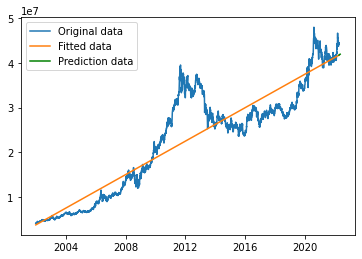

In [17]:
plt.plot(df.index,value, label="Original data")
plt.plot(df.index, fit, label = "Fitted data")
plt.plot(date_predict, pred, 'green', label="Prediction data")
plt.legend(loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mape = mean_absolute_percentage_error(df['Prices'],fit)
mse = mean_squared_error(df['Prices'],fit)
rmse = np.sqrt(mse)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")

MAPE: 17.65%
RMSE: 4777274.13
